In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
from sklearn.datasets import load_digits
digits=load_digits()

In [8]:
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [11]:
print(digits.data.shape , digits.target.shape)

(1797, 64) (1797,)


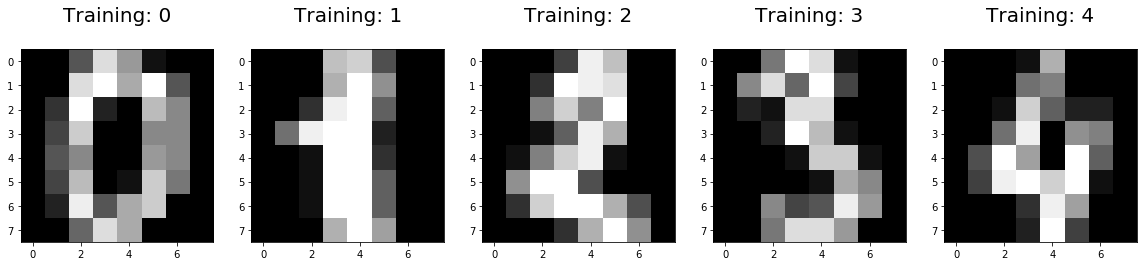

In [17]:
plt.figure(figsize=(20 ,4))
for index , (image , label) in enumerate (zip(digits.data[0:5] , digits.target[0:5])):
    plt.subplot(1 , 5 , index + 1)
    plt.imshow(np.reshape(image , (8 , 8)) , cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label , fontsize = 20)

In [18]:
# lets find the Feature matrix and the Response vectors
X = digits.data
y = digits.target

In [36]:
# lets use Cross-Validation For Better Model Evaluation Procedure
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
from sklearn.model_selection import cross_val_score
score=cross_val_score(logreg , X , y , cv = 10 , scoring =  'accuracy')
score.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

0.9310298346839012

In [55]:
# lets use train_test_split as our module evaluation procedure
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.23 , random_state = 1)
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(1383, 64) (414, 64)
(1383,) (414,)


In [56]:
# lets use our Logisitc Regression algorithm
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train , y_train)
y_pred_class=logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test , y_pred_class))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9637681159420289


In [57]:
# another method for determining the accuracy of the model
score=logreg.score(X_test , y_test)
score

0.9637681159420289

# Confusion Matrix

In [58]:
# Confusion matrix enables us to understand our classification metrics more 
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test , y_pred_class)
confusion

array([[48,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 38,  1,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 31,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 42]], dtype=int64)

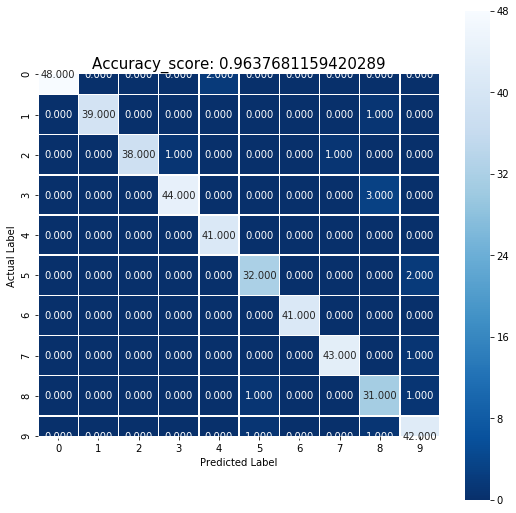

In [65]:
plt.figure(figsize = (9 , 9))
sns.heatmap(confusion , annot = True , fmt = '.3f' , linewidth = .5 , square = True , cmap = 'Blues_r');
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy_score: {0}'.format(score)
plt.title(all_sample_title , size = 15);

In [62]:
# the diagonal numbers shows as the correct prediction 
True_0=confusion[1][1]
True_1=confusion[0][0]
True_9 = confusion[9][9]
False_5 = confusion[0][4]
print(True_0 , True_1 , True_9)
print(False_5)

39 48 42
2


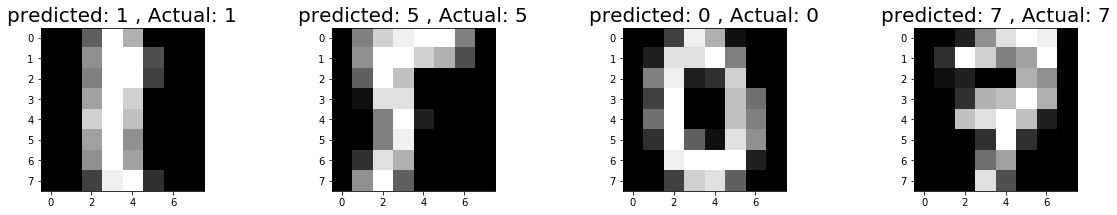

In [70]:
index = 0 
classifiedIndex = []
for predict , actual in zip(y_pred_class , y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20 , 3))
for plotIndex , wrong in enumerate (classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex +1)
    plt.imshow(np.reshape(X_test[wrong] , (8,8)) , cmap = plt.cm.gray)
    plt.title('predicted: {} , Actual: {}'.format(y_pred_class[wrong] , y_test[wrong]) , fontsize = 20)

In [76]:
# lets print the first ten predicted responses
print(logreg.predict(X_test)[0:20])
print(y_test[0:20])

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4]
[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4]
